# Testing and comparing Auto Augmentation techniques
***
Matthieu Olekhnovitch - SnT - University of Luxembourg

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
df = pd.read_csv('results/logs.csv')

In [19]:
df.columns

Index(['dataset', 'num_classes', 'num_train_samples', 'num_test_samples',
       'vae_best_acc', 'vae_best_f1', 'vae_augmented_best_acc',
       'vae_augmented_best_f1', 'vae_augmented_augmented_best_acc',
       'vae_augmented_augmented_best_f1',
       'vae_augmented_augmented_augmented_best_acc',
       'vae_augmented_augmented_augmented_best_f1', 'classifier_best_acc',
       'classifier_best_f1', 'classifier_augmented_best_acc',
       'classifier_augmented_best_f1',
       'classifier_augmented_augmented_best_acc',
       'classifier_augmented_augmented_best_f1',
       'classifier_augmented_augmented_augmented_best_acc',
       'classifier_augmented_augmented_augmented_best_f1'],
      dtype='object')

In [20]:
#Add a column for the overall best augmented vae accuracy
df['best_augmented_vae_accuracy'] = df[['vae_augmented_best_acc', 'vae_augmented_augmented_best_acc', 'vae_augmented_augmented_augmented_best_acc']].max(axis=1)
df['best_augmented_classifier_accuracy'] = df[['classifier_augmented_best_acc', 'classifier_augmented_augmented_best_acc', 'classifier_augmented_augmented_augmented_best_acc']].max(axis=1)
df['best_overall_accuracy'] = df[['best_augmented_vae_accuracy', 'best_augmented_classifier_accuracy']].max(axis=1)
df['percentage_improvement_vae'] = (df['best_augmented_vae_accuracy'] - df['vae_best_acc']) / df['vae_best_acc'] * 100
df['percentage_improvement_classifier'] = (df['best_augmented_classifier_accuracy'] - df['classifier_best_acc']) / df['classifier_best_acc'] * 100
df['percentage_improvement_overall'] = (df['best_overall_accuracy'] - df[['vae_best_acc', 'classifier_best_acc']].max(axis=1)) / df[['vae_best_acc', 'classifier_best_acc']].max(axis=1) * 100

In [21]:
# print dataset names where the percentage improvement is lower than 10%
print(df[df['percentage_improvement_classifier'] < -10]['dataset'])

Series([], Name: dataset, dtype: object)


<Figure size 640x480 with 0 Axes>

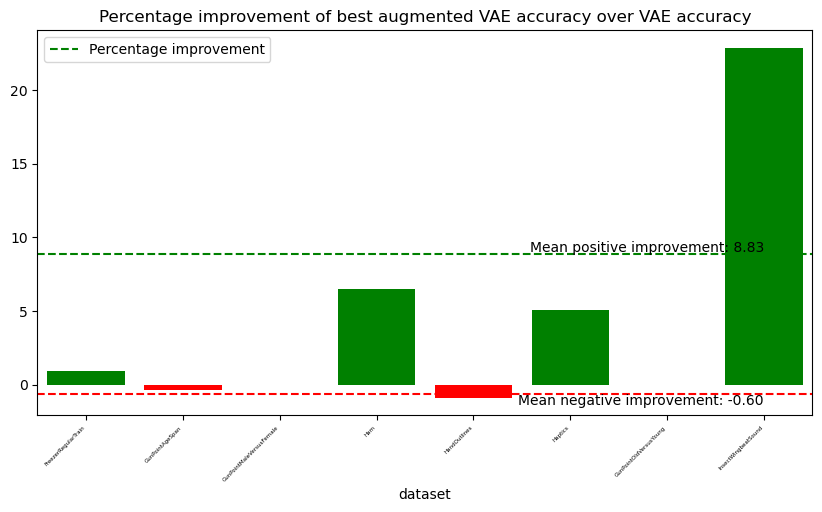

<Figure size 640x480 with 0 Axes>

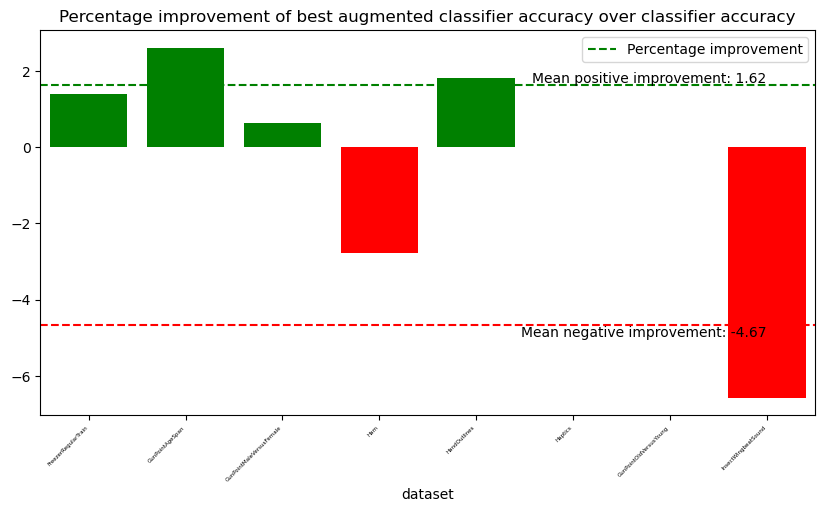

In [22]:
plt.figure()
ax = df.plot(x='dataset', y=['percentage_improvement_vae'], kind='bar', title='Percentage improvement of best augmented VAE accuracy over VAE accuracy', figsize=(10, 5))
ax.set_xticklabels(df['dataset'], rotation=45, ha='right', fontsize=4)  # Adjust the fontsize as per your preference

# Color negative percentages in red and positive percentages in green
colors = ['red' if p < 0 else 'green' for p in df['percentage_improvement_vae']]
ax.bar(df.index, df['percentage_improvement_vae'], color=colors)

# Calculate mean positive percentage improvement
mean_positive_improvement = df[df['percentage_improvement_vae'] > 0]['percentage_improvement_vae'].mean()

# Calculate mean negative percentage improvement
mean_negative_improvement = df[df['percentage_improvement_vae'] < 0]['percentage_improvement_vae'].mean()

# Plot the mean positive percentage improvement
plt.axhline(y=mean_positive_improvement, color='g', linestyle='--')
plt.text(len(df) - 1, mean_positive_improvement, f'Mean positive improvement: {mean_positive_improvement:.2f}', ha='right', va='bottom')

# Plot the mean negative percentage improvement
plt.axhline(y=mean_negative_improvement, color='r', linestyle='--')
plt.text(len(df) - 1, mean_negative_improvement, f'Mean negative improvement: {mean_negative_improvement:.2f}', ha='right', va='top')

plt.legend(['Percentage improvement'])
plt.show()

plt.figure()
ax = df.plot(x='dataset', y=['percentage_improvement_classifier'], kind='bar', title='Percentage improvement of best augmented classifier accuracy over classifier accuracy', figsize=(10, 5))
ax.set_xticklabels(df['dataset'], rotation=45, ha='right', fontsize=4)  # Adjust the fontsize as per your preference

# Color negative percentages in red and positive percentages in green
colors = ['red' if p < 0 else 'green' for p in df['percentage_improvement_classifier']]
ax.bar(df.index, df['percentage_improvement_classifier'], color=colors)

# Calculate mean positive percentage improvement
mean_positive_improvement = df[df['percentage_improvement_classifier'] > 0]['percentage_improvement_classifier'].mean()

# Calculate mean negative percentage improvement
mean_negative_improvement = df[df['percentage_improvement_classifier'] < 0]['percentage_improvement_classifier'].mean()

# Plot the mean positive percentage improvement
plt.axhline(y=mean_positive_improvement, color='g', linestyle='--')

plt.text(len(df) - 1, mean_positive_improvement, f'Mean positive improvement: {mean_positive_improvement:.2f}', ha='right', va='bottom')

# Plot the mean negative percentage improvement
plt.axhline(y=mean_negative_improvement, color='r', linestyle='--')
plt.text(len(df) - 1, mean_negative_improvement, f'Mean negative improvement: {mean_negative_improvement:.2f}', ha='right', va='top')

plt.legend(['Percentage improvement'])
plt.show()



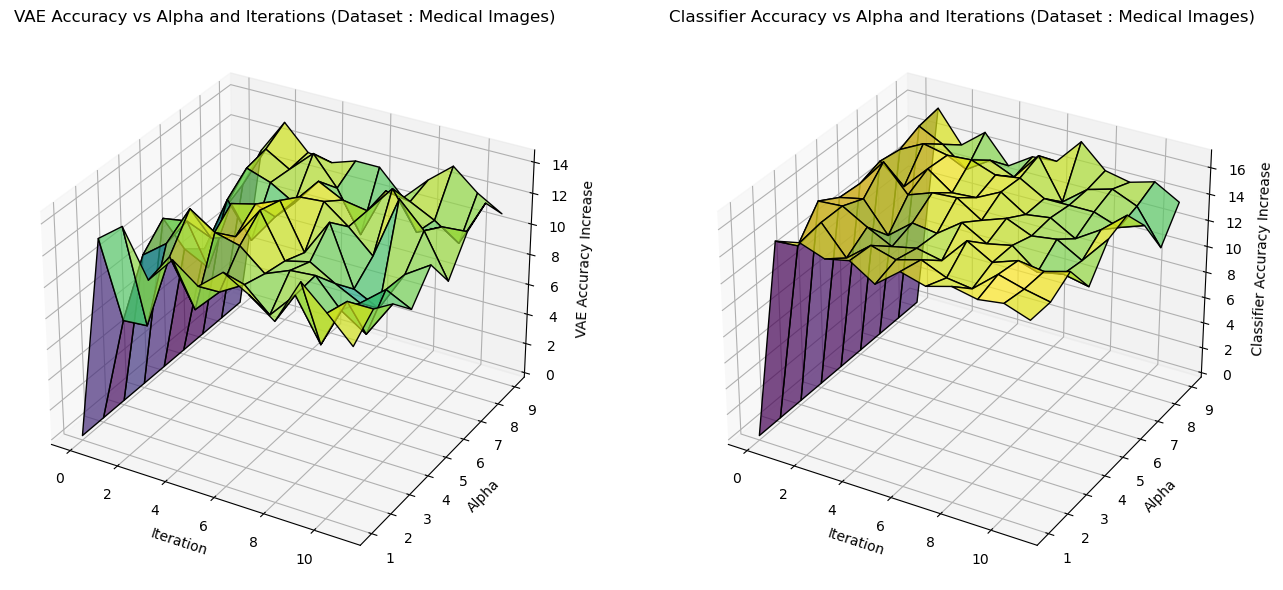

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import numpy as np

# Load data
data = pd.read_csv('results/alpha_study_bis/logs.csv')

data['classifier_best_acc'] = 0.5763157894736842
# Calculate the maximum augmented accuracy for both VAE and classifier
data['vae_max_augmented_acc'] = data[['vae_augmented_step_0_best_acc', 'vae_augmented_step_1_best_acc', 
                                        'vae_augmented_step_2_best_acc', 'vae_augmented_step_3_best_acc', 'vae_augmented_step_4_best_acc', 
                                        'vae_augmented_step_5_best_acc', 'vae_augmented_step_6_best_acc', 'vae_augmented_step_7_best_acc',
                                        'vae_augmented_step_8_best_acc', 'vae_augmented_step_9_best_acc', 'vae_augmented_step_10_best_acc']].max(axis=1)

# Calculate the increase in accuracy
data['vae_acc_increase'] = data['vae_max_augmented_acc'] - data['vae_best_acc']

data['classifier_max_augmented_acc'] = data[['classifier_augmented_step_0_best_acc', 'classifier_augmented_step_1_best_acc',
                                             'classifier_augmented_step_2_best_acc', 'classifier_augmented_step_3_best_acc',
                                             'classifier_augmented_step_4_best_acc', 'classifier_augmented_step_5_best_acc',
                                             'classifier_augmented_step_6_best_acc', 'classifier_augmented_step_7_best_acc',
                                             'classifier_augmented_step_8_best_acc', 'classifier_augmented_step_9_best_acc',
                                             'classifier_augmented_step_10_best_acc']].max(axis=1)

data['classifier_acc_increase'] = data['classifier_max_augmented_acc'] - data['classifier_best_acc']

# Prepare data for plotting
steps = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10,11])
alpha_values = np.array(data['alpha'].values)

# Create meshgrid for steps and alpha
step_grid, alpha_grid = np.meshgrid(steps, alpha_values)

# Prepare the Z values (accuracy increases) for VAE and classifier
vae_acc_grid = np.array([data['vae_best_acc'] - data['vae_best_acc'], 
                         data['vae_augmented_step_0_best_acc'] - data['vae_best_acc'],
                         data['vae_augmented_step_1_best_acc'] - data['vae_best_acc'],
                            data['vae_augmented_step_2_best_acc'] - data['vae_best_acc'],
                            data['vae_augmented_step_3_best_acc'] - data['vae_best_acc'],
                            data['vae_augmented_step_4_best_acc'] - data['vae_best_acc'],
                            data['vae_augmented_step_5_best_acc'] - data['vae_best_acc'],
                            data['vae_augmented_step_6_best_acc'] - data['vae_best_acc'],
                            data['vae_augmented_step_7_best_acc'] - data['vae_best_acc'],
                            data['vae_augmented_step_8_best_acc'] - data['vae_best_acc'],
                            data['vae_augmented_step_9_best_acc'] - data['vae_best_acc'],
                            data['vae_augmented_step_10_best_acc'] - data['vae_best_acc']]).T

vae_acc_grid*= 100

classifier_acc_grid = np.array([data['classifier_best_acc'] - data['classifier_best_acc'],
                                 data['classifier_augmented_step_0_best_acc'] - data['classifier_best_acc'],
                                 data['classifier_augmented_step_1_best_acc'] - data['classifier_best_acc'],
                                 data['classifier_augmented_step_2_best_acc'] - data['classifier_best_acc'],
                                 data['classifier_augmented_step_3_best_acc'] - data['classifier_best_acc'],
                                 data['classifier_augmented_step_4_best_acc'] - data['classifier_best_acc'],
                                 data['classifier_augmented_step_5_best_acc'] - data['classifier_best_acc'],
                                 data['classifier_augmented_step_6_best_acc'] - data['classifier_best_acc'],
                                 data['classifier_augmented_step_7_best_acc'] - data['classifier_best_acc'],
                                 data['classifier_augmented_step_8_best_acc'] - data['classifier_best_acc'],
                                 data['classifier_augmented_step_9_best_acc'] - data['classifier_best_acc'],
                                 data['classifier_augmented_step_10_best_acc'] - data['classifier_best_acc']]).T

classifier_acc_grid*= 100
# Create subplots
fig = plt.figure(figsize=(14, 6))

# Subplot for VAE
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(step_grid, alpha_grid, vae_acc_grid, cmap='viridis', edgecolor='k', alpha=0.7)
# ax1.scatter(step_grid, alpha_grid, vae_acc_grid, c='red', s=50)
ax1.set_xlabel('Iteration')
ax1.set_ylabel('Alpha')
ax1.set_zlabel('VAE Accuracy Increase')
ax1.set_title('VAE Accuracy vs Alpha and Iterations (Dataset : Medical Images)')

ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(step_grid, alpha_grid, classifier_acc_grid, cmap='viridis', edgecolor='k', alpha=0.7)   
ax2.set_xlabel('Iteration')
ax2.set_ylabel('Alpha')
ax2.set_zlabel('Classifier Accuracy Increase')
ax2.set_title('Classifier Accuracy vs Alpha and Iterations (Dataset : Medical Images)')


# Adjust layout and show plot
plt.tight_layout()
plt.show()


# Outputing Dataset names
This creates a text file containing the names of the datasets in the UCR archive.

Datasets names are the folders names in the data/UCRArchive_2018 folder


In [2]:
import os

# Path to the UCR Archive
path = "data/UCRArchive_2018"

# List of the datasets
datasets = os.listdir(path)

# Output the list of datasets
with open("data/datasets_names.txt", "w") as f:
    for dataset in datasets:
        f.write(dataset + "\n")